In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from datetime import datetime


In [ ]:
# Load the dataset
def load_data(file_path):
    df = pd.read_csv(file_path, sep=';')
    print(df.head())
    return df


In [ ]:
# Preprocess the dataset
def preprocess_data(df):
    df['completed_at'] = pd.to_datetime(df['completed_at'])
    df['hour'] = df['completed_at'].dt.hour
    df['day_of_week'] = df['completed_at'].dt.dayofweek
    df['month'] = df['completed_at'].dt.month
    df.drop(['order_id', 'completed_at'], axis=1, inplace=True)
    df.dropna(inplace=True)
    return df


In [ ]:
# Explore the dataset (visualizations)
def explore_data(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='operator_id', order=df['operator_id'].value_counts().index)
    plt.title('Order Count by Operator')
    plt.xlabel('Operator ID')
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='day_of_week', hue='operator_id')
    plt.title('Order Count by Day of Week and Operator')
    plt.xlabel('Day of Week')
    plt.ylabel('Count')
    plt.legend(title='Operator ID')
    plt.show()


In [ ]:

# Train and evaluate models
def train_and_evaluate_models(df):
    X = df.drop('operator_id', axis=1)
    y = df['operator_id']

    # Encoding categorical variables
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Support Vector Machine': SVC(random_state=42),
    }

    # Evaluate classical models
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {
            'accuracy': accuracy,
            'report': classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
        }

    # Train Neural Network
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)

    nn_model = Sequential()
    nn_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    nn_model.add(Dense(16, activation='relu'))
    nn_model.add(Dense(len(le.classes_), activation='softmax'))

    nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    nn_model.fit(X_train, y_train_cat, epochs=50, batch_size=32, verbose=0)

    # Evaluate Neural Network
    nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test_cat, verbose=0)
    results['Neural Network'] = {
        'accuracy': nn_accuracy,
        'report': classification_report(y_test, np.argmax(nn_model.predict(X_test), axis=1), target_names=le.classes_, output_dict=True)
    }

    return results


In [ ]:

# Main function to orchestrate the tasks
def main():
    # Load and preprocess the data
    df = load_data('/content/order-dataset.csv')
    df = preprocess_data(df)

    # Explore the data
    explore_data(df)

    # Train and evaluate models
    results = train_and_evaluate_models(df)

    # Print results
    for model, metrics in results.items():
        print(f"Model: {model}")
        print(f"Accuracy: {metrics['accuracy']:.2f}")
        print("Classification Report:")
        print(metrics['report'])
        print("="*40)

   order_id         completed_at  operator_id
0         1  2022-01-01 21:36:00   operator_5
1         2  2022-01-01 14:23:00  operator_11
2         3  2022-01-01 14:27:00  operator_11
3         4  2022-01-01 20:29:00  operator_15
4         5  2022-01-01 13:45:00  operator_11


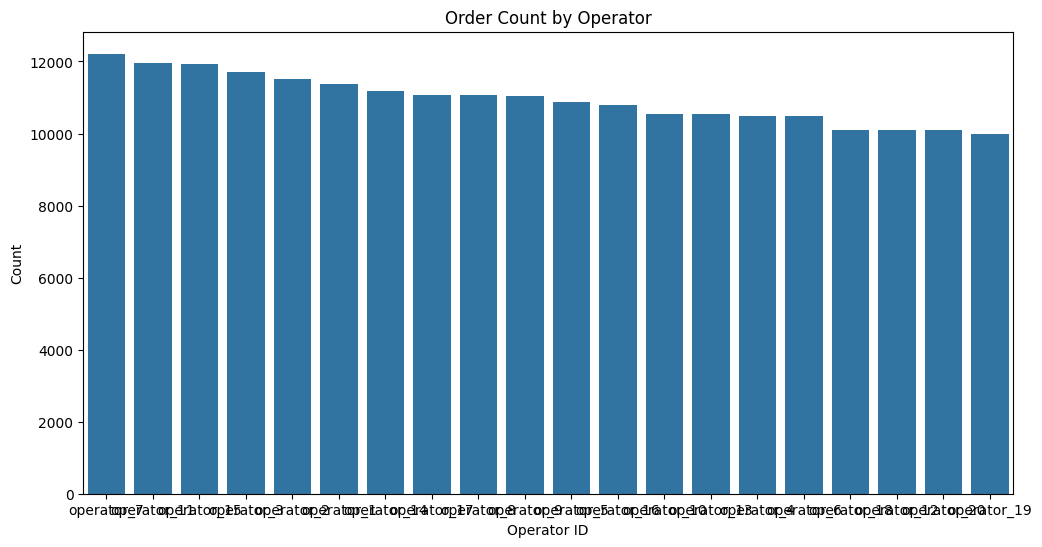

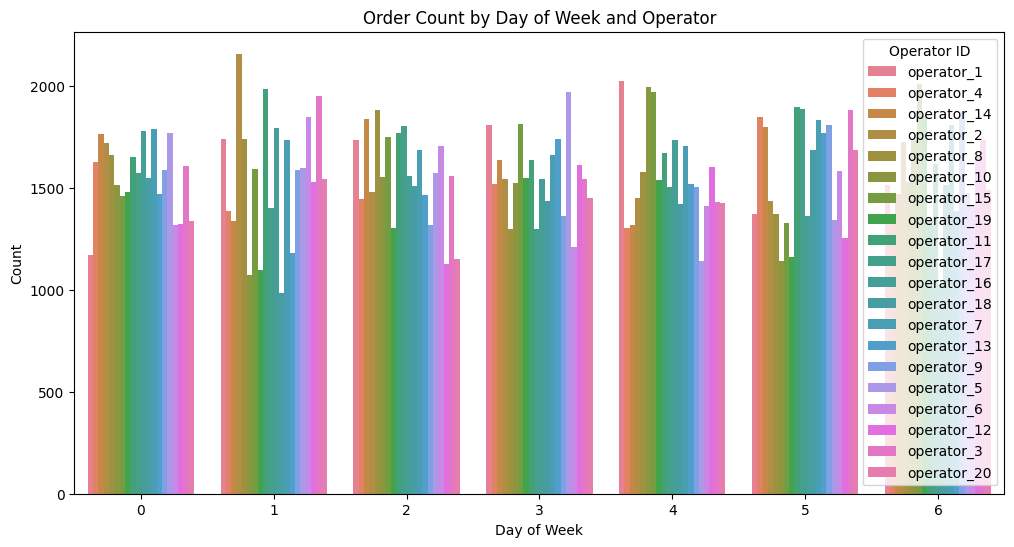

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

1369/1369 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Model: Decision Tree
Accuracy: 0.13
Classification Report:
{'operator_1': {'precision': 0.129800853485064, 'recall': 0.1582827406764961, 'f1-score': 0.14263384134427512, 'support': 2306.0}, 'operator_10': {'precision': 0.1321928460342146, 'recall': 0.07783882783882784, 'f1-score': 0.09798270893371758, 'support': 2184.0}, 'operator_11': {'precision': 0.12764612954186413, 'recall': 0.17220801364023872, 'f1-score': 0.1466158591907095, 'support': 2346.0}, 'operator_12': {'precision': 0.13065976714100905, 'recall': 0.0975374215354901, 'f1-score': 0.11169477467514514, 'support': 2071.0}, 'operator_13': {'precision': 0.13712146988771692, 'recall': 0.19063386944181646, 'f1-score': 0.15950920245398773, 'support': 2114.0}, 'operator_14': {'precision': 0.11069805865344899, 'recall': 0.12424663885025498, 'f1-score': 0.11708169506334644, 'support': 2157.0}, 'operator_15': {'precision': 0.1262853470437018, 'recall': 0.16794871794871793, 'f1-score': 0.144167

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
main()